In [55]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transform
import matplotlib.pyplot as plt

In [56]:
print(torch.__version__)

2.5.1+cu118


In [57]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  # Check for CUDA availability

In [58]:
input_size = 784  # 28x28 images
hidden_size1 = 100  # First hidden layer size
hidden_size2 = 50   # Second hidden layer size
num_classes = 10    # Number of classes (digits 0-9)
num_epochs = 20     # Increase the number of epochs
batch_size = 100    # Batch size
learning_rate = 0.0005  # Learning rate

In [59]:
def load_data(batch_size):
    transform = transform.Compose([transform.ToTensor()])  # Define transformations
    train_data = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
    test_data = torchvision.datasets.MNIST(root='./data', train=False, transform=transform)
    train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
    test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)
    return train_loader, test_loader

torch.Size([100, 1, 28, 28]) torch.Size([100])


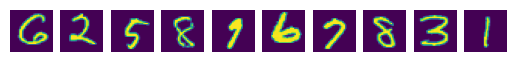

In [60]:
examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(samples[i][0], cmap="viridis")
    plt.axis('off')  # Hide axes
plt.show()

In [61]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.l2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.l3 = nn.Linear(hidden_size2, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu1(out)
        out = self.l2(out)
        out = self.relu2(out)
        out = self.l3(out)
        return out

In [62]:
model = NeuralNet(input_size, hidden_size1, hidden_size2, num_classes).to(device)  # Move model to the device

In [63]:
criterion = nn.CrossEntropyLoss()  # Define the loss function
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  # Define the optimizer

In [64]:
def train_model(model, train_loader, criterion, optimizer, num_epochs):
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
            images = images.reshape(-1, 28 * 28).to(device)  # Flatten the images
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if (i + 1) % 100 == 0:
                print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(train_loader)}], Loss: {loss.item():.4f}')

In [65]:
train_model(model, train_loader, criterion, optimizer, num_epochs)  # Train the model

Epoch [1/20], Step [100/600], Loss: 0.6368
Epoch [1/20], Step [200/600], Loss: 0.4016
Epoch [1/20], Step [300/600], Loss: 0.2936
Epoch [1/20], Step [400/600], Loss: 0.2450
Epoch [1/20], Step [500/600], Loss: 0.3921
Epoch [1/20], Step [600/600], Loss: 0.1732
Epoch [2/20], Step [100/600], Loss: 0.2332
Epoch [2/20], Step [200/600], Loss: 0.1763
Epoch [2/20], Step [300/600], Loss: 0.2260
Epoch [2/20], Step [400/600], Loss: 0.2373
Epoch [2/20], Step [500/600], Loss: 0.1942
Epoch [2/20], Step [600/600], Loss: 0.1358
Epoch [3/20], Step [100/600], Loss: 0.1867
Epoch [3/20], Step [200/600], Loss: 0.2001
Epoch [3/20], Step [300/600], Loss: 0.1495
Epoch [3/20], Step [400/600], Loss: 0.2327
Epoch [3/20], Step [500/600], Loss: 0.2850
Epoch [3/20], Step [600/600], Loss: 0.1433
Epoch [4/20], Step [100/600], Loss: 0.2942
Epoch [4/20], Step [200/600], Loss: 0.1633
Epoch [4/20], Step [300/600], Loss: 0.1527
Epoch [4/20], Step [400/600], Loss: 0.1676
Epoch [4/20], Step [500/600], Loss: 0.1449
Epoch [4/20

In [66]:
def evaluate_model(model, test_loader):
    with torch.no_grad():
        n_correct = 0
        n_samples = 0
        for images, labels in test_loader:
            images = images.reshape(-1, 28 * 28).to(device)  # Flatten the images
            labels = labels.to(device)
            outputs = model(images)

            _, predictions = torch.max(outputs, 1)
            n_samples += labels.shape[0]
            n_correct += (predictions == labels).sum().item()

        acc = 100.0 * n_correct / n_samples
        print(f'Accuracy = {acc:.2f}%')

In [67]:
evaluate_model(model, test_loader)  # Evaluate the model

Accuracy = 97.68%


In [83]:
def test_new_examples(model, image_paths):
    for image_path in image_paths:
        # Load and preprocess the image
        image = Image.open(image_path).convert('L')  # Convert to grayscale
        image = image.resize((28, 28))  # Resize to 28x28
        image = transform.ToTensor()(image)  # Convert to tensor
        image = image.view(-1, 28 * 28).to(device)  # Flatten and move to device

        # Make prediction
        with torch.no_grad():
            output = model(image)
            _, predicted = torch.max(output, 1)

        # Display the image and prediction
        plt.imshow(np.array(image.view(28, 28).cpu()), cmap='viridis')
        plt.axis('off')  # Hide axes
        plt.title(f'Predicted Label: {predicted.item()}')
        plt.show()

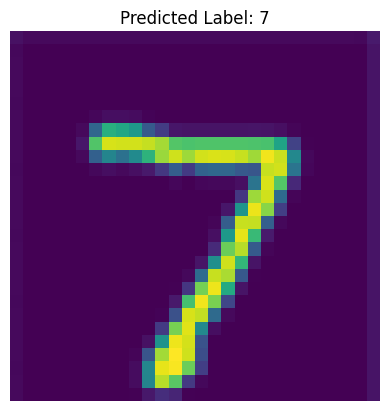

In [102]:
test_new_example(model, r"C:\Users\PC\Desktop\Projects\learning\data\MNIST\raw\image.png")